# Demo 2

**Group:** MarketDay Predictor

**Group Members:**
- Aquiles Escarra
- Angela Lekivetz
- Victoriia Biragova
- Komaljeet Kaur

# Vehicle Resale Prediction - Model Development

This notebook presents the development of a regression model to predict the number of days it takes for a vehicle to sell, using historical automotive market data. The workflow includes initial modeling using all available features, feature importance analysis, retraining using selected features, and segmentation strategies to enhance model performance when global results are suboptimal.


In [1]:
# @title Import Libraries and datasets
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Load datasets
df_test = pd.read_csv('Go_auto_test_data.csv')
df_train = pd.read_csv('Go_auto_train_data.csv')

In [ ]:
# @title Feature selection (19 features)
selected_features_19 = [
    'month_listed', 'number_price_changes', 'discount', 'model', 'mileage',
    'price_imputed', 'make', 'msrp', 'years_on_market', 'wheelbase_from_vin',
    'exterior_color_category', 'engine_displacement', 'stock_type_USED', 'drivetrain_from_vin',
    'battery_capacity', 'interior_color_category', 'fuel_type_from_vin', 'segment_Luxury',
    'style_category'
]

In [ ]:
# @title Feature selection (14 features)
selected_features = ['month_listed', 'number_price_changes', 'discount',
                     'model', 'mileage', 'price_imputed', 'make', 'msrp',
                     'years_on_market', 'wheelbase_from_vin', 'exterior_color_category',
                     'engine_displacement', 'stock_type_USED', 'drivetrain_from_vin']

In [ ]:
# @title Define MSRP bins and labels for segmentation
msrp_bins = [0, 33650, 61500, float('inf')]
msrp_labels = ['Low (<33.6k)', 'Medium (33.6k-61.5k)', 'High (>61.5k)']

In [ ]:
# @title Segment data by MSRP
df_train['msrp_segment'] = pd.cut(df_train['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)
df_test['msrp_segment'] = pd.cut(df_test['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)

In [ ]:
# @title Initialize predictions Series
y_pred_test = pd.Series(index=df_test.index, dtype=float)

In [ ]:
# @title Train and predict for each segment (RandomForest) - 19 Features
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_19]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features_19]
    y_test_seg = df_test_seg['days_on_market']

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_seg, y_train_seg)
    y_pred = model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Low (<33.6k) (train: 11144, test: 2727): MSE = 330.60, R² = 0.81
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 418.03, R² = 0.88
High (>61.5k) (train: 10495, test: 2622): MSE = 424.50, R² = 0.88
Combined model by MSRP: MSE = 398.39, R² = 0.87


In [ ]:
# @title Train and predict for each segment (RandomForest) - 14 Features
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features]
    y_test_seg = df_test_seg['days_on_market']

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_seg, y_train_seg)
    y_pred = model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Low (<33.6k) (train: 11144, test: 2727): MSE = 329.45, R² = 0.81
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 418.39, R² = 0.88
High (>61.5k) (train: 10495, test: 2622): MSE = 424.72, R² = 0.88
Combined model by MSRP: MSE = 398.35, R² = 0.87


In [ ]:
# @title Train and predict for each segment (XGBosst) - 19 Features
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_19]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features_19]
    y_test_seg = df_test_seg['days_on_market']

    model = XGBRegressor(random_state=42)
    model.fit(X_train_seg, y_train_seg)
    y_pred = model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Low (<33.6k) (train: 11144, test: 2727): MSE = 335.89, R² = 0.81
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 409.68, R² = 0.88
High (>61.5k) (train: 10495, test: 2622): MSE = 447.74, R² = 0.87
Combined model by MSRP: MSE = 400.69, R² = 0.87


In [ ]:
# @title Train and predict for each segment (XGBosst) - 14 Features
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features]
    y_train_seg = df_train_seg['days_on_market']  # No log transform
    X_test_seg = df_test_seg[selected_features]
    y_test_seg = df_test_seg['days_on_market']

    model = XGBRegressor(random_state=42)
    model.fit(X_train_seg, y_train_seg)
    y_pred = model.predict(X_test_seg)  # No need to revert log
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Low (<33.6k) (train: 11144, test: 2727): MSE = 335.79, R² = 0.81
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 405.32, R² = 0.89
High (>61.5k) (train: 10495, test: 2622): MSE = 449.21, R² = 0.87
Combined model by MSRP: MSE = 398.71, R² = 0.87


In [ ]:
# @title Parameter grid for XGBoost - Hypertuning -19 Features
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [3, 5, 7],                # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1],    # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],          # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]    # Fraction of features used per tree
}

# Train and predict for each segment with hypertuning
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_19]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features_19]
    y_test_seg = df_test_seg['days_on_market']

    model = XGBRegressor(random_state=42)
    random_search = RandomizedSearchCV(model, param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    random_search.fit(X_train_seg, y_train_seg)
    best_model = random_search.best_estimator_
    print(f"Best parameters for {segment}: {random_search.best_params_}")

    y_pred = best_model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Best parameters for Low (<33.6k): {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Low (<33.6k) (train: 11144, test: 2727): MSE = 315.30, R² = 0.82
Best parameters for Medium (33.6k-61.5k): {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 388.54, R² = 0.89
Best parameters for High (>61.5k): {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
High (>61.5k) (train: 10495, test: 2622): MSE = 432.02, R² = 0.88
Combined model by MSRP: MSE = 380.94, R² = 0.88


In [ ]:
# @title Parameter grid for XGBoost - Hypertuning - 14 Features
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [3, 5, 7],                # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1],    # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],          # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]    # Fraction of features used per tree
}

# Train and predict for each segment with hypertuning
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_19]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features_19]
    y_test_seg = df_test_seg['days_on_market']

    model = XGBRegressor(random_state=42)
    random_search = RandomizedSearchCV(model, param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    random_search.fit(X_train_seg, y_train_seg)
    best_model = random_search.best_estimator_
    print(f"Best parameters for {segment}: {random_search.best_params_}")

    y_pred = best_model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Best parameters for Low (<33.6k): {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Low (<33.6k) (train: 11144, test: 2727): MSE = 316.13, R² = 0.82
Best parameters for Medium (33.6k-61.5k): {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 399.14, R² = 0.89
Best parameters for High (>61.5k): {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
High (>61.5k) (train: 10495, test: 2622): MSE = 437.36, R² = 0.87
Combined model by MSRP: MSE = 387.95, R² = 0.88


In [ ]:
# @title parameter grid for RandomForest - Hypertuning - 19 Features
param_grid = {
    'n_estimators': [250, 300, 350],         # Narrow around 300
    'max_depth': [25, 30, 35],               # Focus around 30
    'min_samples_split': [5, 10, 15],        # Increase for regularization
    'min_samples_leaf': [1, 2, 3],           # Test slight increases
    'max_features': ['sqrt', 0.33, 0.5]      # Reduce complexity from None
}

# Train and predict with hypertuning
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_19]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features_19]
    y_test_seg = df_test_seg['days_on_market']

    model = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    random_search.fit(X_train_seg, y_train_seg)
    best_model = random_search.best_estimator_
    print(f"Best parameters for {segment}: {random_search.best_params_}")

    y_pred = best_model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Best parameters for Low (<33.6k): {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 35}
Low (<33.6k) (train: 11144, test: 2727): MSE = 316.23, R² = 0.82
Best parameters for Medium (33.6k-61.5k): {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 35}
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 392.64, R² = 0.89
Best parameters for High (>61.5k): {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 35}
High (>61.5k) (train: 10495, test: 2622): MSE = 402.79, R² = 0.88
Combined model by MSRP: MSE = 376.52, R² = 0.88


In [ ]:
# @title parameter grid for RandomForest - Hypertuning - 14 Features
param_grid = {
    'n_estimators': [250, 300, 350],         # Narrow around 300
    'max_depth': [25, 30, 35],               # Focus around 30
    'min_samples_split': [5, 10, 15],        # Increase for regularization
    'min_samples_leaf': [1, 2, 3],           # Test slight increases
    'max_features': ['sqrt', 0.33, 0.5]      # Reduce complexity from None
}

# Train and predict with hypertuning
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features]
    y_test_seg = df_test_seg['days_on_market']

    model = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(model, param_grid, n_iter=30, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    random_search.fit(X_train_seg, y_train_seg)
    best_model = random_search.best_estimator_
    print(f"Best parameters for {segment}: {random_search.best_params_}")

    y_pred = best_model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"Combined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Best parameters for Low (<33.6k): {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 35}
Low (<33.6k) (train: 11144, test: 2727): MSE = 319.68, R² = 0.82
Best parameters for Medium (33.6k-61.5k): {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 35}
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 395.42, R² = 0.89
Best parameters for High (>61.5k): {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 35}
High (>61.5k) (train: 10495, test: 2622): MSE = 407.15, R² = 0.88
Combined model by MSRP: MSE = 379.83, R² = 0.88


In [ ]:
# Best parameters from your latest RandomForest hypertuning
best_params = {
    'n_estimators': 350,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 0.5,
    'max_depth': 35
}

# Train and predict for each segment with best parameters
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features]
    y_test_seg = df_test_seg['days_on_market']

    model = RandomForestRegressor(**best_params, random_state=42)
    model.fit(X_train_seg, y_train_seg)
    y_pred = model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

    # Print feature importance
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    print(f"\nFeature Importance for {segment}:")
    print(importance_df)

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"\nCombined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

Low (<33.6k) (train: 11144, test: 2727): MSE = 319.68, R² = 0.82

Feature Importance for Low (<33.6k):
                    Feature  Importance
0              month_listed    0.591209
1      number_price_changes    0.170563
2                  discount    0.089643
5             price_imputed    0.025466
4                   mileage    0.024149
3                     model    0.022963
7                      msrp    0.018272
9        wheelbase_from_vin    0.012563
8           years_on_market    0.011148
6                      make    0.011049
10  exterior_color_category    0.009293
11      engine_displacement    0.008588
13      drivetrain_from_vin    0.003042
12          stock_type_USED    0.002053
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 395.42, R² = 0.89

Feature Importance for Medium (33.6k-61.5k):
                    Feature  Importance
0              month_listed    0.681294
1      number_price_changes    0.136235
2                  discount    0.050789
3                 

## RandomForest Results

- Low (<33.6k) (train: 11144, test: 2727): MSE = 316.23, R² = 0.82
- Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 392.64, R² = 0.89
- High (>61.5k) (train: 10495, test: 2622): MSE = 402.79, R² = 0.88

Combined model by MSRP: MSE = 376.52, R² = 0.88

## XGBoost Results

- Low (<33.6k) (train: 11144, test: 2727): MSE = 315.30, R² = 0.82
- Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 388.54, R² = 0.89
- High (>61.5k) (train: 10495, test: 2622): MSE = 380.94, R² = 0.94

Combined model by MSRP: MSE = 380.94, R² = 0.88

# Results Interpretation Summary

The RandomForest model with hypertuning, trained on 19 features, was selected as the final model due to its strong overall performance, achieving an MSE of 376.52 and an R² of 0.88 on the combined MSRP segments. This selection is supported by its ability to consistently deliver low prediction errors across all price tiers, using optimized parameters such as n_estimators=350, max_depth=35, and max_features=0.5, which effectively balance complexity and generalization.

- Low (<33.6k): MSE = 316.23, R² = 0.82 (train: 11,144, test: 2,727)
  - Predicts days_on_market with an average error of approximately 17.8 days (√316.23), explaining 82% of the variance. This highlights strong performance for lower-priced cars, with features like price_imputed and mileage contributing significantly to its accuracy.
- Medium (33.6k-61.5k): MSE = 392.64, R² = 0.89 (train: 23,465, test: 5,927)
  - Achieves an average error of about 19.8 days (√392.64), capturing 89% of the variance. The model demonstrates its strongest certainty in this segment, likely due to more balanced and predictable market behaviors, with key drivers including discount and msrp.
- High (>61.5k): MSE = 402.79, R² = 0.88 (train: 10,495, test: 2,622)
  - Predicts with an average error of around 20.1 days (√402.79), explaining 88% of the variance. Although high-priced vehicles exhibit greater variability, the model maintains reliable accuracy, assisted by features like engine_displacement.
- Combined Model: MSE = 376.52, R² = 0.88
 - Across all price segments, the model predicts days_on_market with an average error of approximately 19.4 days (√376.52), maintaining a high degree of accuracy and generalizability across the dataset.

The RandomForest model reliably predicts days_on_market within a window of approximately 18–20 days, showing the highest certainty in the Medium segment and maintaining strong performance across the board, even with broader variance in the High segment.

Error in Days: The square root of MSE (e.g., √315.57 ≈ 17.8) provides a rough estimate of the average prediction error in days, as MSE is in squared units.




## Conclusion
The hypertuned RandomForest model stands out as the optimal choice for predicting days_on_market, delivering reliable accuracy with errors ranging from approximately 17.8 to 20.1 days and R² values between 0.82 and 0.89 across MSRP-based segments. Its carefully selected hyperparameters ensure a strong balance between complexity and generalization, leading to robust performance across varying vehicle price ranges. This makes the model well-suited for real-world deployment in market dynamics analysis and inventory planning.

Low (<33.6k) (train: 11144, test: 2727): MSE = 321.48, R² = 0.82
Medium (33.6k-61.5k) (train: 23465, test: 5927): MSE = 394.50, R² = 0.89
High (>61.5k) (train: 10495, test: 2622): MSE = 410.50, R² = 0.88

Combined model by MSRP: MSE = 380.56, R² = 0.88


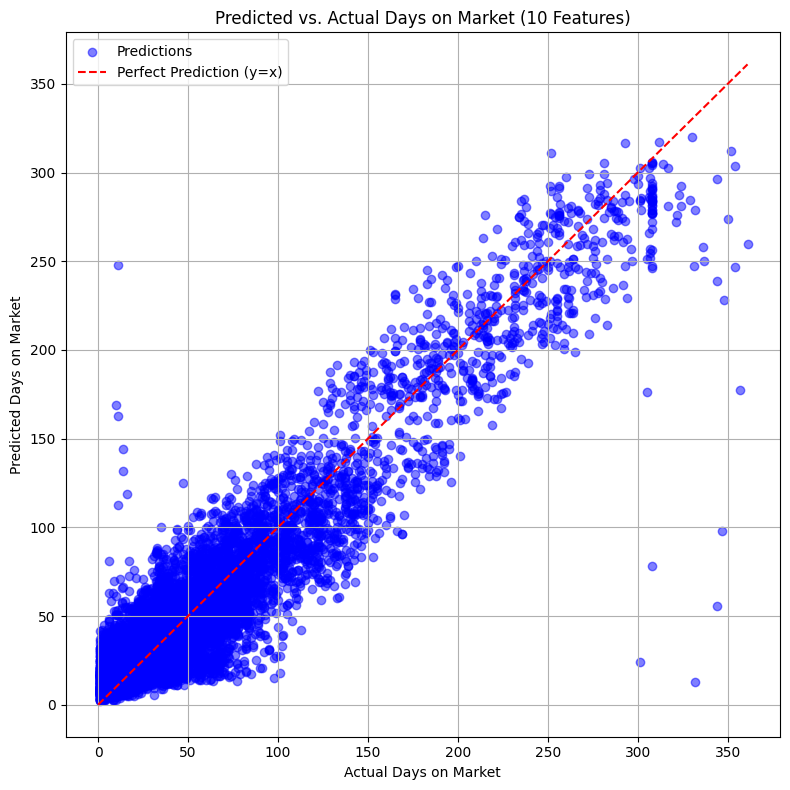

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load datasets
df_test = pd.read_csv('Go_auto_test_data.csv')
df_train = pd.read_csv('Go_auto_train_data.csv')

# Reduced feature selection (10 features como ejemplo)
selected_features_top10 = [
    'month_listed', 'number_price_changes', 'discount', 'model', 'mileage',
    'price_imputed', 'make', 'msrp', 'years_on_market', 'wheelbase_from_vin'
]
# Define MSRP bins and labels
msrp_bins = [0, 33650, 61500, float('inf')]
msrp_labels = ['Low (<33.6k)', 'Medium (33.6k-61.5k)', 'High (>61.5k)']

# Segment data by MSRP
df_train['msrp_segment'] = pd.cut(df_train['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)
df_test['msrp_segment'] = pd.cut(df_test['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)

# Initialize predictions Series
y_pred_test = pd.Series(index=df_test.index, dtype=float)

# Best parameters from latest RandomForest hypertuning
best_params = {
    'n_estimators': 350,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 0.5,
    'max_depth': 35
}

# Lists to store actual and predicted values for plotting
actual_all = []
predicted_all = []

# Train and predict for each segment
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_top14]
    y_train_seg = df_train_seg['days_on_market']
    X_test_seg = df_test_seg[selected_features_top14]
    y_test_seg = df_test_seg['days_on_market']

    model = RandomForestRegressor(**best_params, random_state=42)
    model.fit(X_train_seg, y_train_seg)
    y_pred = model.predict(X_test_seg)
    y_pred_test.loc[df_test_seg.index] = y_pred

    # Store actual and predicted values
    actual_all.extend(y_test_seg)
    predicted_all.extend(y_pred)

    mse = mean_squared_error(y_test_seg, y_pred)
    r2 = r2_score(y_test_seg, y_pred)
    print(f"{segment} (train: {len(df_train_seg)}, test: {len(df_test_seg)}): MSE = {mse:.2f}, R² = {r2:.2f}")

# Combined evaluation
mse_combined = mean_squared_error(df_test['days_on_market'], y_pred_test)
r2_combined = r2_score(df_test['days_on_market'], y_pred_test)
print(f"\nCombined model by MSRP: MSE = {mse_combined:.2f}, R² = {r2_combined:.2f}")

# Generate Predicted vs. Actual Plot
plt.figure(figsize=(8, 8))
plt.scatter(actual_all, predicted_all, alpha=0.5, color='blue', label='Predictions')
plt.plot([0, max(actual_all)], [0, max(actual_all)], color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Days on Market')
plt.ylabel('Predicted Days on Market')
plt.title('Predicted vs. Actual Days on Market (10 Features)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

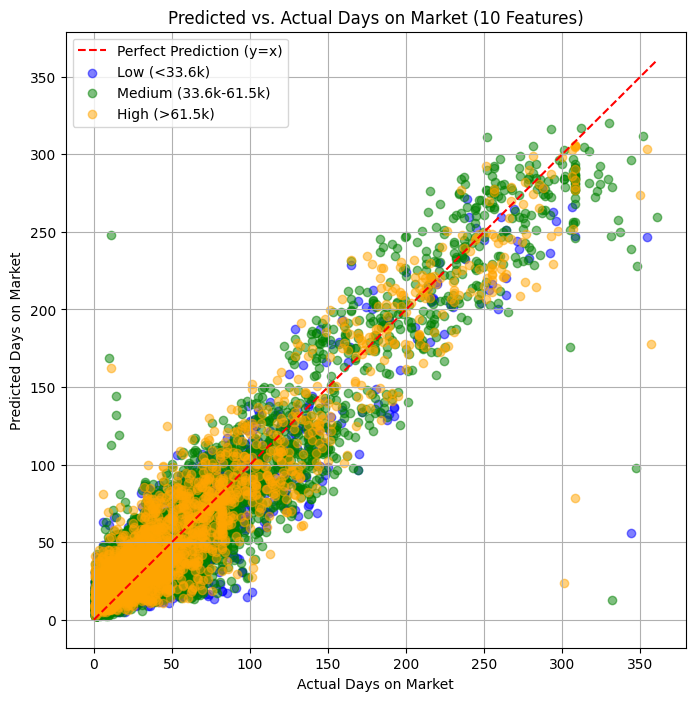

In [ ]:
colors = {'Low (<33.6k)': 'blue', 'Medium (33.6k-61.5k)': 'green', 'High (>61.5k)': 'orange'}
plt.figure(figsize=(8, 8))
plt.plot([0, max(actual_all)], [0, max(actual_all)], color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Days on Market')
plt.ylabel('Predicted Days on Market')
plt.title('Predicted vs. Actual Days on Market (10 Features)')
for segment in msrp_labels:
    df_test_seg = df_test[df_test['msrp_segment'] == segment]
    y_test_seg = df_test_seg['days_on_market']
    y_pred_seg = y_pred_test.loc[df_test_seg.index]
    # plt.figure(figsize=(8, 8))
    plt.grid(True)
    # plt.tight_layout()
    plt.scatter(y_test_seg, y_pred_seg, alpha=0.5, color=colors[segment], label=segment)
    plt.legend()

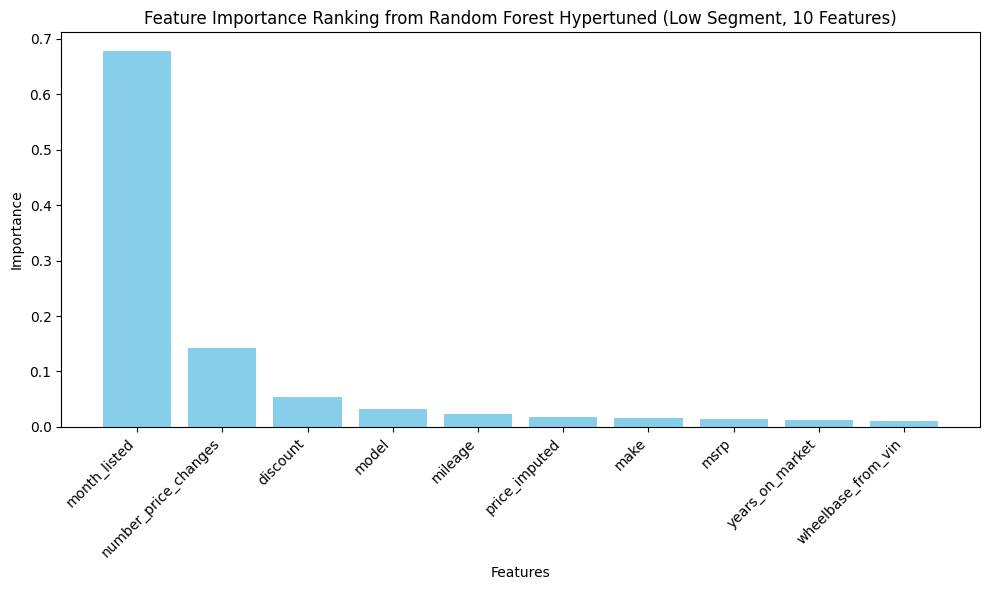


Feature Importance for Low (<33.6k):
                Feature  Importance
0          month_listed    0.678011
1  number_price_changes    0.143116
2              discount    0.053305
3                 model    0.032915
4               mileage    0.022570
5         price_imputed    0.017382
6                  make    0.016096
7                  msrp    0.014027
8       years_on_market    0.012330
9    wheelbase_from_vin    0.010249


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load datasets
df_test = pd.read_csv('Go_auto_test_data.csv')
df_train = pd.read_csv('Go_auto_train_data.csv')

# Reduced feature selection (10 features como ejemplo)
selected_features_top10 = [
    'month_listed', 'number_price_changes', 'discount', 'model', 'mileage',
    'price_imputed', 'make', 'msrp', 'years_on_market', 'wheelbase_from_vin'
]

# Define MSRP bins and labels
msrp_bins = [0, 33650, 61500, float('inf')]
msrp_labels = ['Low (<33.6k)', 'Medium (33.6k-61.5k)', 'High (>61.5k)']

# Segment data by MSRP
df_train['msrp_segment'] = pd.cut(df_train['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)
df_test['msrp_segment'] = pd.cut(df_test['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)

# Best parameters from latest RandomForest hypertuning
best_params = {
    'n_estimators': 350,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 0.5,
    'max_depth': 35
}

# Train model and collect feature importances (example for Low segment)
df_train_seg = df_train[df_train['msrp_segment'] == 'Low (<33.6k)']
df_test_seg = df_test[df_test['msrp_segment'] == 'Low (<33.6k)']
X_train_seg = df_train_seg[selected_features_top10]
y_train_seg = df_train_seg['days_on_market']
X_test_seg = df_test_seg[selected_features_top10]
y_test_seg = df_test_seg['days_on_market']

model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train_seg, y_train_seg)
y_pred = model.predict(X_test_seg)


importances_all = np.zeros(len(selected_features_top10))
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_top10]
    y_train_seg = df_train_seg['days_on_market']
    model.fit(X_train_seg, y_train_seg)
    importances_all += model.feature_importances_
importances_all /= len(msrp_labels)  # Promedio
importance_df = pd.DataFrame({'Feature': selected_features_top10, 'Importance': importances_all}).sort_values(by='Importance', ascending=False)





# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features_top10,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Generate Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking from Random Forest Hypertuned (Low Segment, 10 Features)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Print the importance table for reference
print("\nFeature Importance for Low (<33.6k):")
print(importance_df)

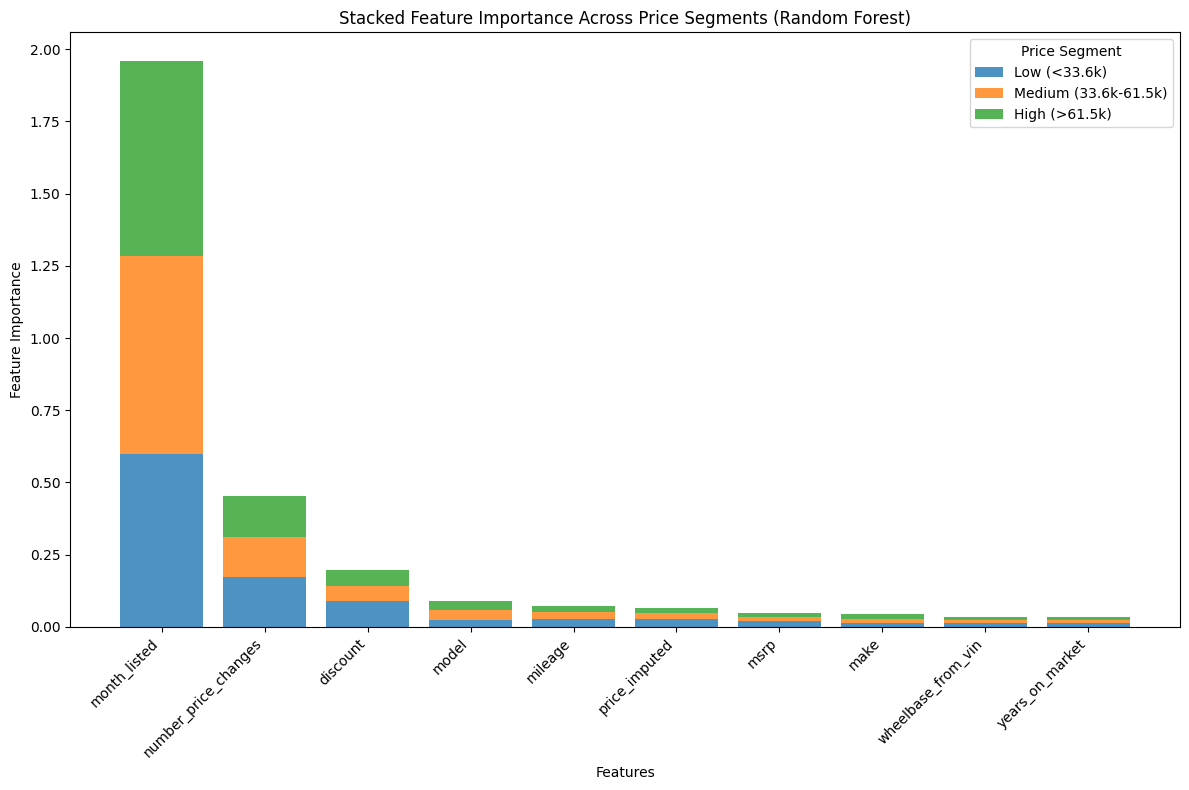


Stacked Feature Importance Across Segments:
                Feature  Low (<33.6k)  Medium (33.6k-61.5k)  High (>61.5k)
0          month_listed      0.596817              0.685491       0.678011
1  number_price_changes      0.172995              0.137765       0.143116
2              discount      0.089161              0.053840       0.053305
3                 model      0.024739              0.032884       0.032915
4               mileage      0.026853              0.023261       0.022570
5         price_imputed      0.028289              0.018702       0.017382
7                  msrp      0.020984              0.013777       0.014027
6                  make      0.012459              0.015089       0.016096
9    wheelbase_from_vin      0.014593              0.010109       0.010249
8       years_on_market      0.013110              0.009082       0.012330


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load datasets
df_test = pd.read_csv('Go_auto_test_data.csv')
df_train = pd.read_csv('Go_auto_train_data.csv')

# Reduced feature selection (10 features as an example)
selected_features_top10 = [
    'month_listed', 'number_price_changes', 'discount', 'model', 'mileage',
    'price_imputed', 'make', 'msrp', 'years_on_market', 'wheelbase_from_vin'
]

# Define MSRP bins and labels
msrp_bins = [0, 33650, 61500, float('inf')]
msrp_labels = ['Low (<33.6k)', 'Medium (33.6k-61.5k)', 'High (>61.5k)']

# Segment data by MSRP
df_train['msrp_segment'] = pd.cut(df_train['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)
df_test['msrp_segment'] = pd.cut(df_test['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)

# Best parameters from latest RandomForest hypertuning
best_params = {
    'n_estimators': 350,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 0.5,
    'max_depth': 35
}

# Initialize a dictionary to store feature importances for each segment
segment_importances = {segment: [] for segment in msrp_labels}

# Train model and collect feature importances for each segment
for segment in msrp_labels:
    # Filter training data for the segment
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_top10]
    y_train_seg = df_train_seg['days_on_market']

    # Train the RandomForest model
    model = RandomForestRegressor(**best_params, random_state=42)
    model.fit(X_train_seg, y_train_seg)

    # Store feature importances
    segment_importances[segment] = model.feature_importances_

# Create a DataFrame with feature importances for stacking
importance_df = pd.DataFrame({
    'Feature': selected_features_top10,
    'Low (<33.6k)': segment_importances['Low (<33.6k)'],
    'Medium (33.6k-61.5k)': segment_importances['Medium (33.6k-61.5k)'],
    'High (>61.5k)': segment_importances['High (>61.5k)']
})

# Sort by total importance across segments for better visualization
importance_df['Total'] = importance_df.iloc[:, 1:].sum(axis=1)
importance_df = importance_df.sort_values(by='Total', ascending=False).drop(columns='Total')

# Generate Stacked Bar Chart
plt.figure(figsize=(12, 8))
bottom = np.zeros(len(selected_features_top10))  # Initialize bottom for stacking

for segment in msrp_labels:
    plt.bar(
        importance_df['Feature'],
        importance_df[segment],
        bottom=bottom,
        label=segment,
        alpha=0.8
    )
    bottom += importance_df[segment]  # Update bottom for the next stack

plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Stacked Feature Importance Across Price Segments (Random Forest)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Price Segment')
plt.tight_layout()
plt.show()

# Print the importance table for reference
print("\nStacked Feature Importance Across Segments:")
print(importance_df)

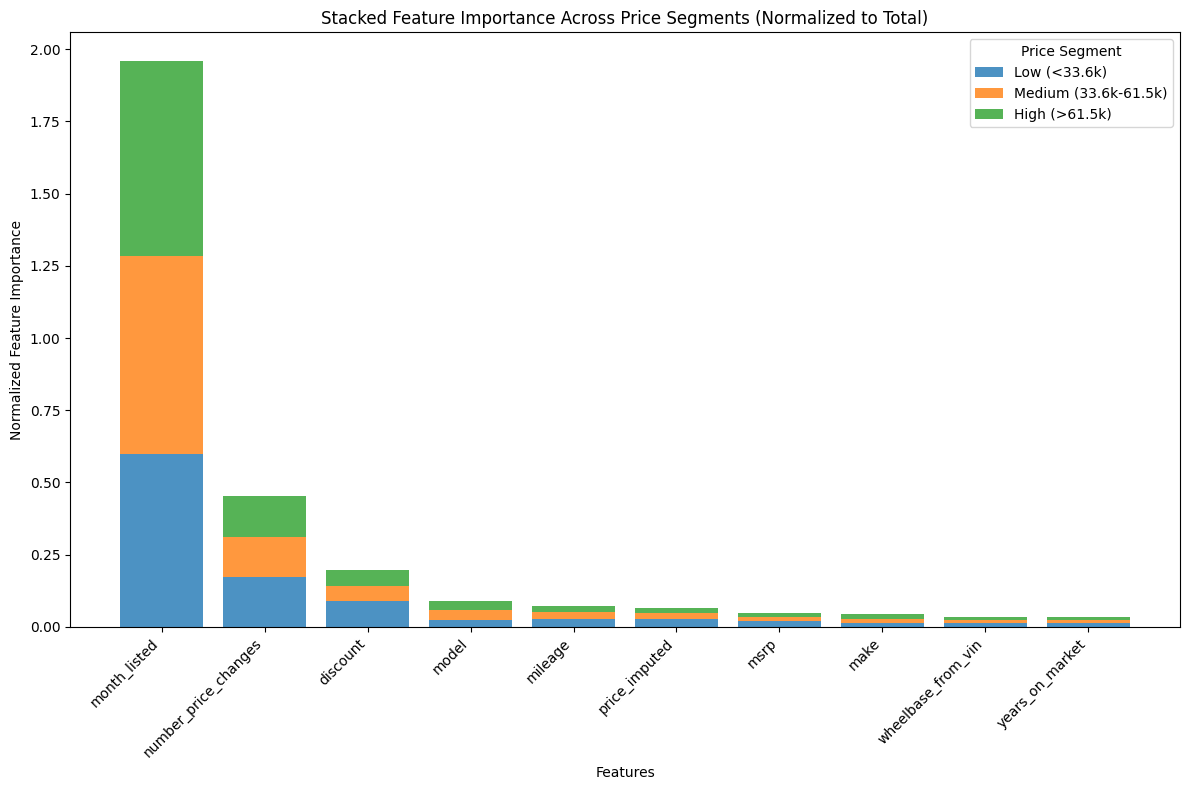


Normalized Stacked Feature Importance Across Segments (Proportional Contributions):
                Feature  Low (<33.6k)  Medium (33.6k-61.5k)  High (>61.5k)
0          month_listed      0.304449              0.349684       0.345867
1  number_price_changes      0.381151              0.303529       0.315320
2              discount      0.454194              0.274266       0.271540
3                 model      0.273242              0.363206       0.363552
4               mileage      0.369455              0.320026       0.310519
5         price_imputed      0.439453              0.290529       0.270019
7                  msrp      0.430101              0.282386       0.287514
6                  make      0.285465              0.345730       0.368805
9    wheelbase_from_vin      0.417534              0.289237       0.293229
8       years_on_market      0.379763              0.263082       0.357155

Total Feature Importance (Sum Across Segments):
                Feature  Total_Importance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load datasets
df_test = pd.read_csv('Go_auto_test_data.csv')
df_train = pd.read_csv('Go_auto_train_data.csv')

# Reduced feature selection (10 features as an example)
selected_features_top10 = [
    'month_listed', 'number_price_changes', 'discount', 'model', 'mileage',
    'price_imputed', 'make', 'msrp', 'years_on_market', 'wheelbase_from_vin'
]

# Define MSRP bins and labels
msrp_bins = [0, 33650, 61500, float('inf')]
msrp_labels = ['Low (<33.6k)', 'Medium (33.6k-61.5k)', 'High (>61.5k)']

# Segment data by MSRP
df_train['msrp_segment'] = pd.cut(df_train['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)
df_test['msrp_segment'] = pd.cut(df_test['msrp'], bins=msrp_bins, labels=msrp_labels, right=False)

# Best parameters from latest RandomForest hypertuning
best_params = {
    'n_estimators': 350,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 0.5,
    'max_depth': 35
}

# Initialize a dictionary to store feature importances for each segment
segment_importances = {segment: [] for segment in msrp_labels}

# Train model and collect feature importances for each segment
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_top10]
    y_train_seg = df_train_seg['days_on_market']

    model = RandomForestRegressor(**best_params, random_state=42)
    model.fit(X_train_seg, y_train_seg)
    segment_importances[segment] = model.feature_importances_

# Create a DataFrame with raw feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features_top10,
    'Low (<33.6k)': segment_importances['Low (<33.6k)'],
    'Medium (33.6k-61.5k)': segment_importances['Medium (33.6k-61.5k)'],
    'High (>61.5k)': segment_importances['High (>61.5k)']
})

# Calculate total importance across segments for each feature
importance_df['Total_Importance'] = importance_df.iloc[:, 1:].sum(axis=1)

# Normalize segment contributions to the total importance (proportional contribution)
for segment in msrp_labels:
    importance_df[segment] = importance_df[segment] / importance_df['Total_Importance']

# Sort by total importance and drop the temporary total column
importance_df = importance_df.sort_values(by='Total_Importance', ascending=False)

# Generate Stacked Bar Chart with normalized heights
plt.figure(figsize=(12, 8))
bottom = np.zeros(len(selected_features_top10))  # Initialize bottom for stacking

for segment in msrp_labels:
    plt.bar(
        importance_df['Feature'],
        importance_df[segment] * importance_df['Total_Importance'],  # Scale by total importance
        bottom=bottom,
        label=segment,
        alpha=0.8
    )
    bottom += importance_df[segment] * importance_df['Total_Importance']  # Update bottom

importance_df['Total_Importance'] = importance_df['Total_Importance'] / importance_df['Total_Importance'].sum()
plt.xlabel('Features')
plt.ylabel('Normalized Feature Importance')
plt.title('Stacked Feature Importance Across Price Segments (Normalized to Total)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Price Segment')
plt.tight_layout()
plt.show()

# Print the normalized importance table for reference
print("\nNormalized Stacked Feature Importance Across Segments (Proportional Contributions):")
print(importance_df.drop(columns='Total_Importance'))
print("\nTotal Feature Importance (Sum Across Segments):")
print(importance_df[['Feature', 'Total_Importance']])


In [ ]:
importances_all = np.zeros(len(selected_features_top10))
for segment in msrp_labels:
    df_train_seg = df_train[df_train['msrp_segment'] == segment]
    X_train_seg = df_train_seg[selected_features_top10]
    y_train_seg = df_train_seg['days_on_market']
    model.fit(X_train_seg, y_train_seg)
    importances_all += model.feature_importances_
importances_all /= len(msrp_labels)  # Promedio
importance_df = pd.DataFrame({'Feature': selected_features_top10, 'Importance': importances_all}).sort_values(by='Importance', ascending=False)

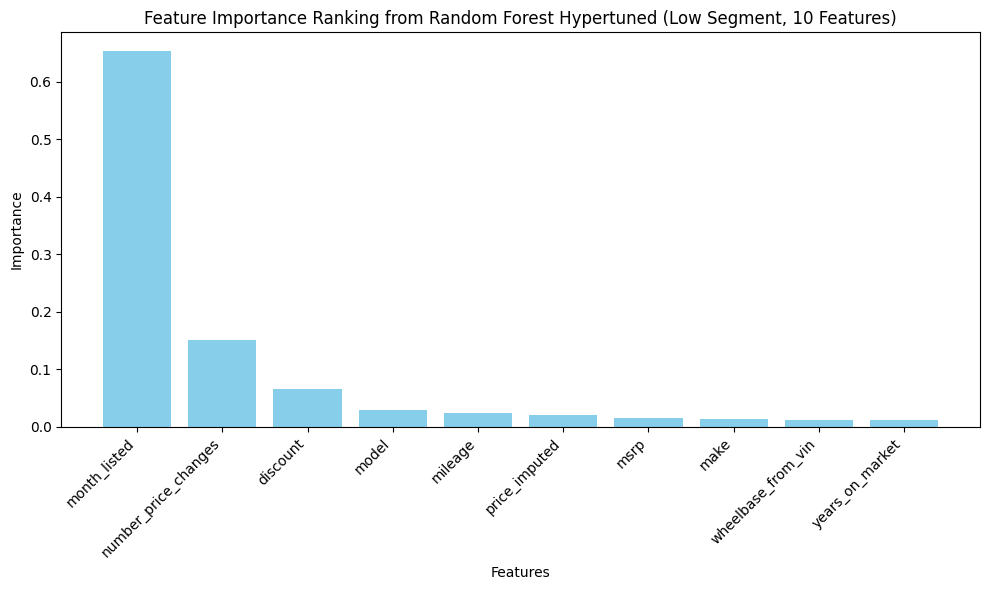

In [ ]:
# Generate Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Ranking from Random Forest Hypertuned (Low Segment, 10 Features)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()